# "Support Vector Machines"
> "SVM"

- toc: true
- badges: true
- comments: true
- categories: [machine learning]
- hide: false
- search_exclude: true

SVM aims to make the margings as large as possible between closest data points of those classes. 

# Key ideas

- find hyperplane that separates the class 
- increase the margin that separates the class 
- use kernal spec to make the model work for Non Linear data.

# Applications

- Handwriting recognition 
- facial recognition

we can apply it for Linear as well as Non Linear. For Non Linear data we will use kerner spec.

# Linear vs Non Linear

![](https://user-images.githubusercontent.com/8268939/82466239-fecdb780-9a74-11ea-8723-52ea50c95654.png)

# Usecases

- regression
- classification

# Hypothesis function 

Lets say we have training samples ${(x_i, y_i), i=1 to n}$ where $x_i \in {R}$ are input training samples and $y_i$ where $y_i \in \{-1, +1\}$ are class attributes i.e output classifications.

Lets assume these are linearly separable, then there exist vector $w \in R$ and scalar $b \in R$

$w^T x_i + b > 0, \forall i  \text{ such that } y_i = +1$

$w^T x_i + b < 0, \forall i  \text{ such that } y_i = -1$

Since the classes are linearly separable, there exists a line that separates the 2 classes.

$w_T x + b = 0$

By scaling above equation, we can also find such that there will be no samples existing between these hyperplanes.

$w_T x + b \geq 1, \forall i  \text{ such that } y_i = +1$
$w_T x + b \leq -1, \forall i  \text{ such that } y_i = -1$

The above equations can also be written as....

$y_i * [w^T x_i + b ] \geq 1, i \in \{1...n\}$

The distance between these equations is called **margin**

![image](https://user-images.githubusercontent.com/8268939/83337847-9603ed80-a273-11ea-8d78-bf9621da5f4a.png)

# Goal of SVM

To find the max margin between the hyperplanes such that there will be no data points in between them.

![image](https://user-images.githubusercontent.com/8268939/82343745-13904980-99a8-11ea-8a4f-39583fe81eef.png)

# SVM margin width

![image](https://user-images.githubusercontent.com/8268939/83341367-7d0d3380-a297-11ea-833d-ad00e632ce09.png)

![image](https://user-images.githubusercontent.com/8268939/82405620-4888b480-9a19-11ea-8325-e0646ea060a3.png)

# Optimization problem 

The width equation $\frac{2}{||w||}$ also can be taken as $\frac{1}{2* ||w||^2}$ which is $\frac{1}{2 * w^T * w}$

Maximize $\frac{2}{||w||}$ mean minimize $\frac{1}{2 * w^T * w}$

**For Hard Margin SVM**

Minimize : $\Phi(\mathbf{w})=1 / 2 \mathbf{w}^{T} \mathbf{w}$

Subject to $: y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{\mathbf{i}}+b\right)-1 \geq 0 \quad \forall i$

Integrating constraints into lagrangian form...

> Note: Minimize $: J(\mathbf{w}, b, \boldsymbol{\alpha})=1 / 2 \mathbf{w}^{T} \mathbf{w}-\sum_{i=1}^{N} \alpha_{i} y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{\mathbf{i}}+b\right)+\sum_{i=1}^{N} \alpha_{i}$

> Note: Subject to $: \alpha_{i} \geq 0 \quad \forall i$

Minimize J wrt $w$ and $b$ and maximize wrt $\alpha$

# SVM Types

[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcblx0QVtTVk0gVHlwZXNdIC0tPiBCKEhhcmQgTWFyZ2luKVxuXHRBIC0tPiBDKFNvZnQgTWFyZ2luKVxuXG4iLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlfQ)](https://mermaid-js.github.io/mermaid-live-editor/#/edit/eyJjb2RlIjoiZ3JhcGggVERcblx0QVtTVk0gVHlwZXNdIC0tPiBCKEhhcmQgTWFyZ2luKVxuXHRBIC0tPiBDKFNvZnQgTWFyZ2luKVxuXG4iLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlfQ)

# using kernel spec

![17A37789-E666-4712-9A6E-23D1F47CC0E5](https://user-images.githubusercontent.com/8268939/82531120-91ad3700-9af3-11ea-9b6e-3498cb54f858.jpeg)





In [0]:
# load iris dataset

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df = iris_df.loc[iris_df['target'].isin([0,1])]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
iris_df.shape

(100, 5)

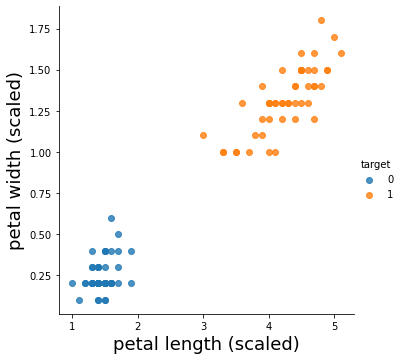

In [0]:
# visualize
sns.lmplot(x='petal length (cm)',y='petal width (cm)',hue='target',data=iris_df, fit_reg=False)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [0]:
# separate input and output variables from dataframe
X=iris_df.iloc[0:3]
y=iris.iloc[:,4]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [0]:
# train the model with default hyperparameter
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


In [0]:
# print confusion matrix 
print(metrics.confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
